# Excercise: Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). This problem is also famously known as the eigenface problem. Mathematically, we would like to find the principal components (or eigenvectors) of the covariance matrix of the set of face images. These eigenvectors are essentially a set of orthonormal features depicts the amount of variation between face images. When plotted, these eigenvectors are called eigenfaces.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import sklearn
from sklearn.datasets import fetch_lfw_people

import seaborn as sns

#### Setup data

(4822, 62, 47)


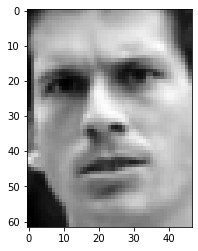

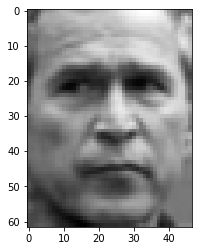

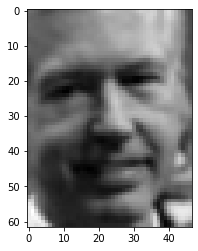

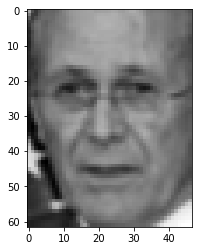

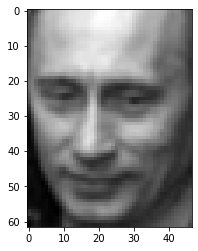

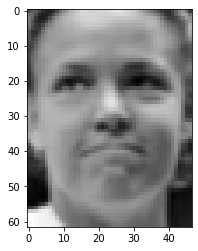

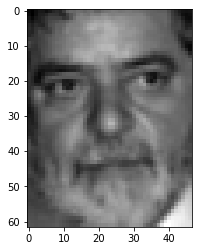

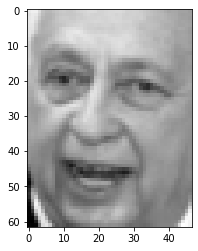

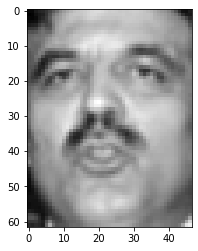

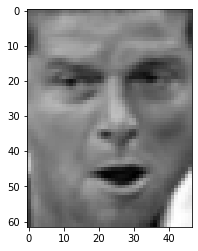

In [2]:
faces = fetch_lfw_people(min_faces_per_person=8)
X = faces.data
y = faces.target

#print(faces.target_names)
print(faces.images.shape)
for i in range(10):
        plt.imshow(faces.images[i],cmap='binary_r')
        plt.show()
        


Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 2914). This means that we have 2914 features defining each image. These 2914 features will result into 2914 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

In [9]:
def EigFace(X,comp_100):
    
        """ X is a matrix mXn size with m being number of samples; n being all pixels arranged row wise of a given image
            comp_100 is a boolean ;If True number of components=100; If False number of components=accoording to 95%Variance preservation
            Returns:Top k Eigen Vectors arranged in a matrix row wise and the new projected matrix representation
        """
        
        #Centering the data around the mean
    
        X_Mean = np.mean(X,axis=0)
        X_Mean = X_Mean.reshape(1, -1) #shape 1*2914
        X -= X_Mean                #  X - Xmean from each row i.e. each sample
        N = (X.shape)[0]
        
        #Covariance Matrix Calculation
        
        Covariance = (1/(N-1))*(np.dot(np.transpose(X),X)) 
        Covariance = np.array(Covariance,dtype=float)

        #Computing Eigen Values and Eigen Vectors and sorting them in descending order
        
        e_value,e_vector = np.linalg.eig(Covariance)
        #print(X_Mean.shape,e_value.shape,e_vector.shape)
        idx = e_value.argsort()[::-1]
        e_sorted = e_value[idx][:]
        e_sorted = np.reshape(e_value,e_value.shape[0])
        
        
        #Plotting Eigen Values
    
        x = np.linspace(1,e_sorted.shape[0],e_sorted.shape[0])
        plt.plot(x,e_sorted)
        
        #Choosing no.of Principal components to be considered and plotting the considered Eigen Values in orange
        
        if comp_100==False:
            for i in range(20,e_sorted.shape[0],1):
                percentage= np.sum(e_sorted[0:i])/np.sum(e_sorted[:])
                if percentage>0.95:
                    k=i
                    print('variance preserved:',percentage,'no.of components preserving 95% of variance:',k)
                    break
        else:
            k=100
        y = e_sorted[0:k]
        x = np.linspace(1,k,k)
        plt.plot(x,y)
        plt.xlabel('Number of Eigen Values')
        plt.ylabel('Eigen Values')
        plt.show()
        print('Smallest eigenvalue considered:',y[k-1])
        
        e_vec_sorted = np.atleast_1d(e_vector[:, idx])[:, :k]
        #print(e_vector.shape,e_vec_sorted.shape)
        print('Shape of Eigen_Vector matrix representing data: ',e_vec_sorted.shape)

        #Perfroming PCA

        X_projected = np.matmul(X, e_vec_sorted)
        print('New Representation for 4822 images:',X_projected.shape)
        
        return(X_projected,e_vec_sorted)


        

        

In [10]:
def Reconstruct(X_projected,e_vec_sorted):
        reconstruct=np.empty(X.shape)
        
        for j in range(X_projected.shape[0]):
            for i in range(e_vec_sorted.shape[1]):
                reconstruct[j] += e_vec_sorted[:,i]*X_projected[j,i]


        #print(reconstruct.shape)
        
        error = ((np.sum(np.square(X-reconstruct)))/(4822*2914))**0.5
        print('Rms error per pixel in reconstruction:',error)
        return(reconstruct,error)

variance preserved: 0.9501007994459129 no.of components preserving 95% of variance: 178


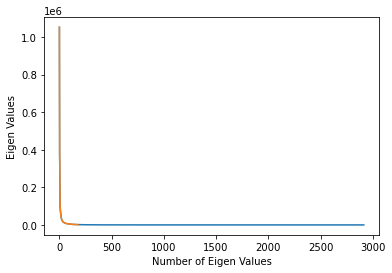

Smallest eigenvalue considered: 1628.5967620516426
Shape of Eigen_Vector matrix representing data:  (2914, 178)
New Representation for 4822 images: (4822, 178)
Rms error per pixel in reconstruction: 9.093094362814421


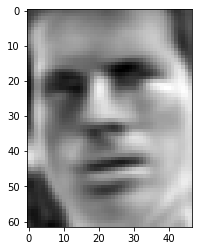

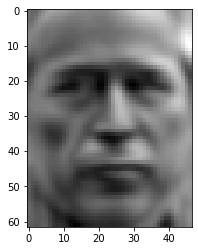

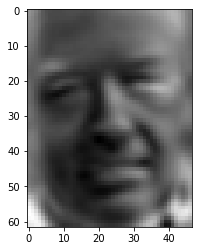

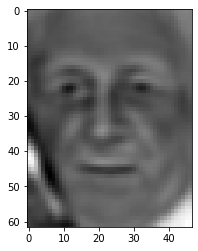

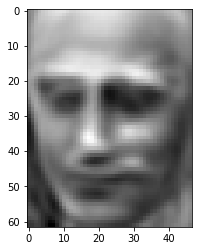

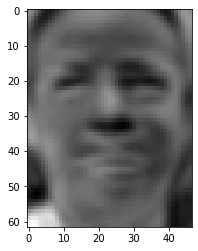

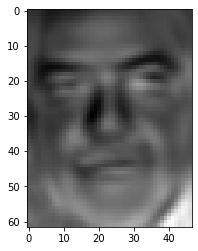

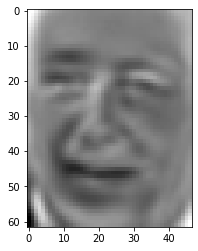

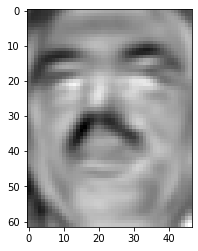

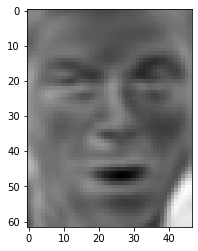

In [11]:
#Applying PCA and reconstructing image with 95% Variance Preserved
X_projected,e_vec_sorted=EigFace(X,False)
reconstruct,error=Reconstruct(X_projected,e_vec_sorted)
Reconstructed_images= np.reshape(reconstruct,faces.images.shape)
#print(reconstruct.shape,X.shape,Reconstructed_images.shape)

for i in range(10):
        plt.imshow(Reconstructed_images[i],cmap='binary_r')
        plt.show()

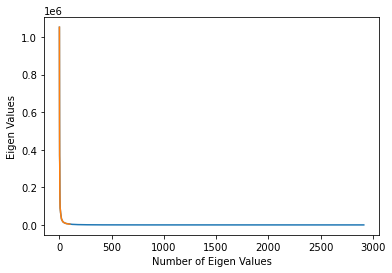

Smallest eigenvalue considered: 4148.526447702545
Shape of Eigen_Vector matrix representing data:  (2914, 100)
New Representation for 4822 images: (4822, 100)
Rms error per pixel in reconstruction: 12.346474327040386


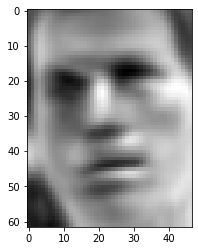

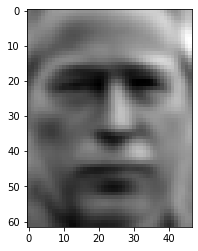

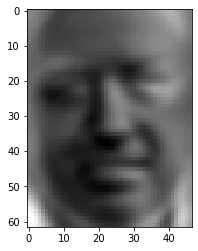

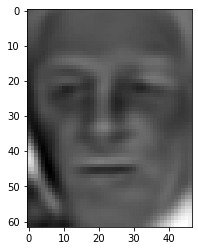

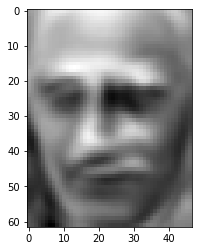

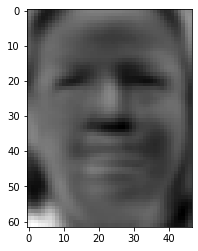

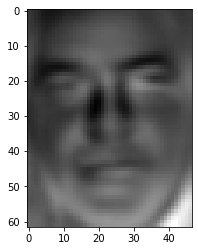

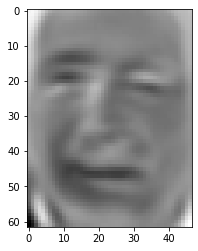

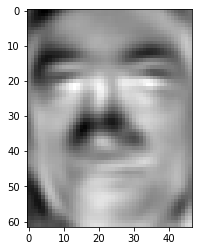

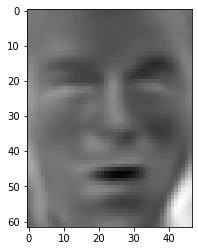

In [12]:
#Applying PCA and reconstructing image with only 100 Eigen Vectors/Principal Components
X_projected,e_vec_sorted=EigFace(X,True)
reconstruct,error=Reconstruct(X_projected,e_vec_sorted)
Reconstructed_images= np.reshape(reconstruct,faces.images.shape)
#print(reconstruct.shape,X.shape,Reconstructed_images.shape)

for i in range(10):
        plt.imshow(Reconstructed_images[i],cmap='binary_r')
        plt.show()

# Adding noise to images

We now add gaussian noise to the images. Will PCA be able to effectively perform dimensionality reduction? 

In [13]:
def plot_noisy_faces(noisy_faces):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')

Below we plot first twenty noisy input face images.

(4822, 2914)


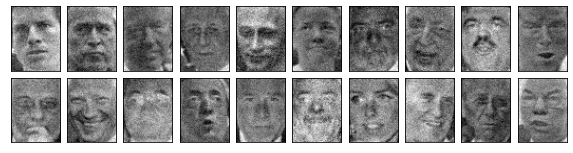

In [14]:
np.random.seed(42)
noisy_faces = np.random.normal(X, 15)
plot_noisy_faces(noisy_faces)
print (noisy_faces.shape)

variance preserved: 0.9500115980092649 no.of components preserving 95% of variance: 1014


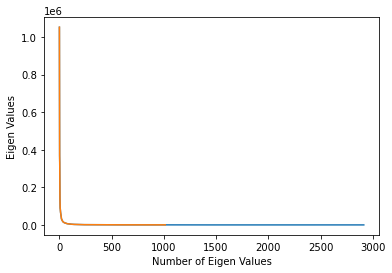

Smallest eigenvalue considered: 352.40812945182404
Shape of Eigen_Vector matrix representing data:  (2914, 1014)
New Representation for 4822 images: (4822, 1014)
Rms error per pixel in reconstruction: 12.215323342280424


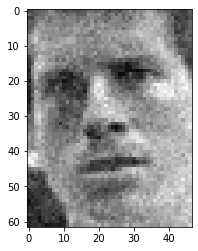

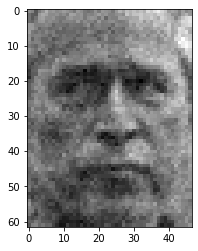

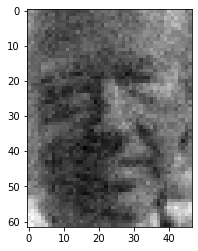

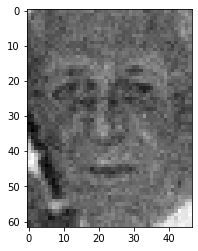

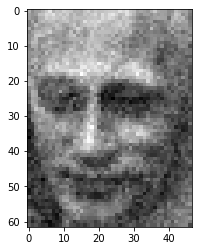

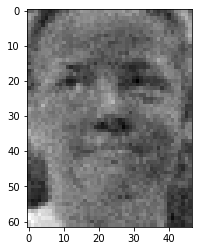

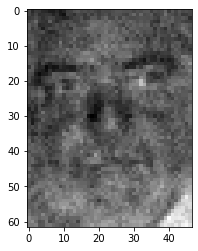

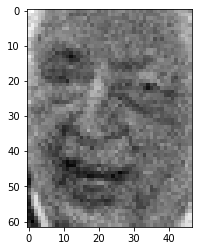

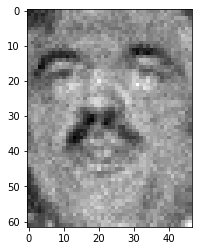

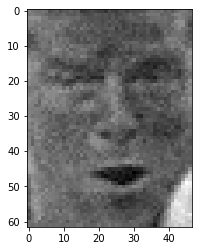

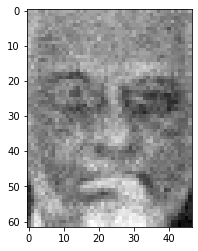

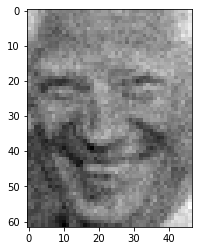

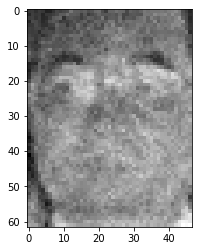

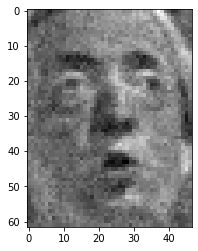

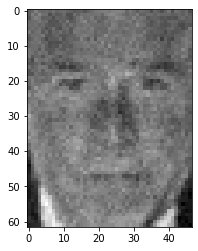

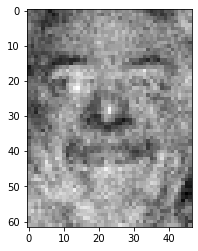

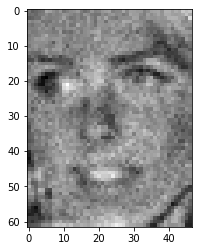

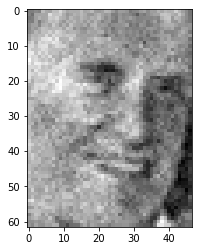

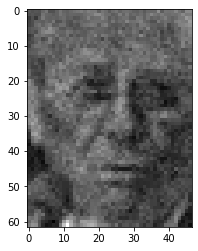

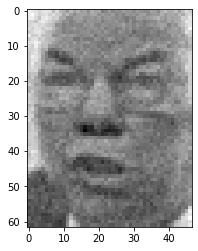

In [15]:
#Applying PCA and reconstructing image with 95% Variance Preserved on Noisy Images

X_projected,e_vec_sorted=EigFace(noisy_faces, False)
reconstruct,error=Reconstruct(X_projected,e_vec_sorted)
Reconstructed_images= np.reshape(reconstruct,faces.images.shape)
#print(reconstruct.shape,X.shape,Reconstructed_images.shape)

for i in range(20):
        plt.imshow(Reconstructed_images[i],cmap='binary_r')
        plt.show()

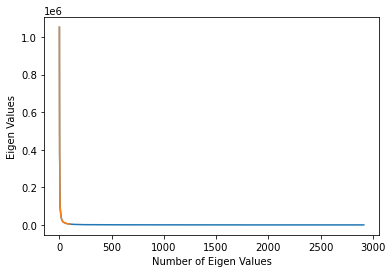

Smallest eigenvalue considered: 4549.23706144855
Shape of Eigen_Vector matrix representing data:  (2914, 100)
New Representation for 4822 images: (4822, 100)
Rms error per pixel in reconstruction: 12.853655772034479


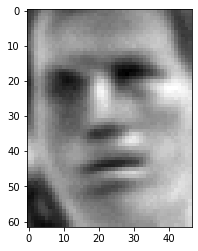

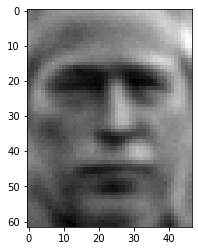

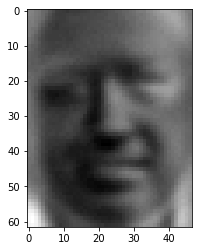

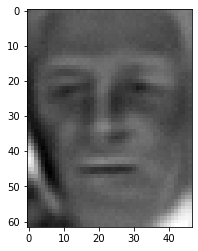

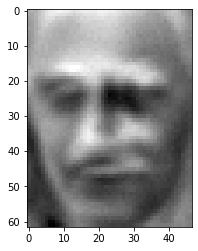

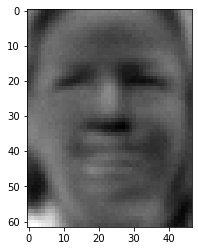

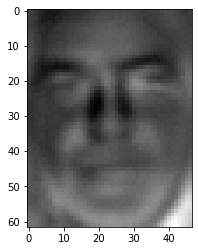

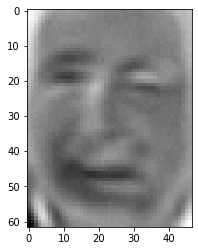

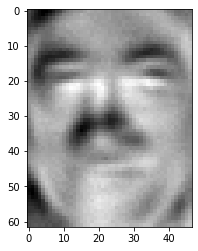

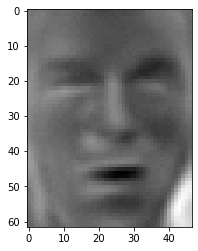

In [16]:
#Applying PCA and reconstructing image with only 100 Eigen Vectors/Principal Components on Noisy Images
X_projected,e_vec_sorted=EigFace(noisy_faces, True)
reconstruct,error=Reconstruct(X_projected,e_vec_sorted)
Reconstructed_images= np.reshape(reconstruct,faces.images.shape)
#print(reconstruct.shape,X.shape,Reconstructed_images.shape)

for i in range(10):
        plt.imshow(Reconstructed_images[i],cmap='binary_r')
        plt.show()